### Google Analytics

This Project is based on a sample of a dataset from a google analytics gathering. The objectives of this project were multiple.\
First i analysed the data and make some charts that better represent this daatset.\
Then i did some clsutering to group clients and analyse the groups a bit.\
After that i did some classification. I tried to predict whether the client would or would not make a transaction.\
Then i did some time series prediction on the revenue.\
Lastly i used flask to implement both the time series model as well as the classification model, giving a full report.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv",dtype={'fullVisitorID': str})

In [3]:
data.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,0361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [4]:
data.info() #fullVisitorID  int too large --> str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392892 entries, 0 to 392891
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fullVisitorID       392892 non-null  object 
 1   visitNumber         392892 non-null  int64  
 2   date                392892 non-null  int64  
 3   bounces             195964 non-null  float64
 4   hits                392892 non-null  int64  
 5   pageviews           392856 non-null  float64
 6   timeOnSite          196399 non-null  float64
 7   transactionRevenue  5277 non-null    float64
 8   transactions        5277 non-null    float64
 9   source              392892 non-null  object 
 10  channelGrouping     392892 non-null  object 
 11  browser             392892 non-null  object 
 12  deviceCategory      392892 non-null  object 
 13  country             392892 non-null  object 
 14  city                392892 non-null  object 
dtypes: float64(5), int64(3), object(7)

In [5]:
data.describe() 

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions
count,392892.000000,3.928920e+05,195964.0,392892.000000,392856.000000,196399.000000,5277.000000,5277.000000
mean,2.361198,2.017037e+07,1.0,4.414065,3.771015,276.837127,162.838217,1.047754
std,10.158865,1.692571e+02,0.0,8.555069,6.414908,485.765241,898.877951,0.571294
min,1.000000,2.017010e+07,1.0,1.000000,1.000000,1.000000,2.200000,1.000000
25%,1.000000,2.017022e+07,1.0,1.000000,1.000000,33.000000,29.180000,1.000000
50%,1.000000,2.017033e+07,1.0,2.000000,1.000000,94.000000,53.950000,1.000000
75%,1.000000,2.017052e+07,1.0,4.000000,4.000000,287.000000,114.530000,1.000000
max,389.000000,2.017063e+07,1.0,500.000000,466.000000,12136.000000,47082.060000,25.000000


In [6]:
data.date = pd.to_datetime(data['date'], format='%Y%m%d')

In [7]:
data.isnull().sum()/data.shape[0]

fullVisitorID         0.000000
visitNumber           0.000000
date                  0.000000
bounces               0.501227
hits                  0.000000
pageviews             0.000092
timeOnSite            0.500120
transactionRevenue    0.986569
transactions          0.986569
source                0.000000
channelGrouping       0.000000
browser               0.000000
deviceCategory        0.000000
country               0.000000
city                  0.000000
dtype: float64

In [8]:
data.bounces.fillna(value = 0,inplace = True)         #nulls means value 0
data.transactionRevenue.fillna(value = 0,inplace = True)
data.transactions.fillna(value = 0,inplace = True)
data.timeOnSite.fillna(value = 0,inplace = True)

In [9]:
for i in data:    
    print (i.upper() , "\n  ")    
    print(data[i].value_counts())
    print("-" *50)

FULLVISITORID 
  
1957458976293878100    135
7634897085866546110    116
3148617623907142276    112
3525537916960843419    111
6018775317735347795    102
                      ... 
2516883680451518076      1
8470395405039158224      1
5033852215210090912      1
2137988868960989251      1
5702933691355875018      1
Name: fullVisitorID, Length: 308130, dtype: int64
--------------------------------------------------
VISITNUMBER 
  
1      298788
2       43812
3       16727
4        8907
5        5406
        ...  
357         1
358         1
177         1
176         1
352         1
Name: visitNumber, Length: 376, dtype: int64
--------------------------------------------------
DATE 
  
2017-04-26    4224
2017-01-24    3618
2017-05-17    3117
2017-05-16    3098
2017-01-25    2986
              ... 
2017-06-17    1391
2017-05-06    1383
2017-01-01    1364
2017-05-14    1290
2017-05-13    1251
Name: date, Length: 181, dtype: int64
--------------------------------------------------
BOUNCES 
  

<AxesSubplot:>

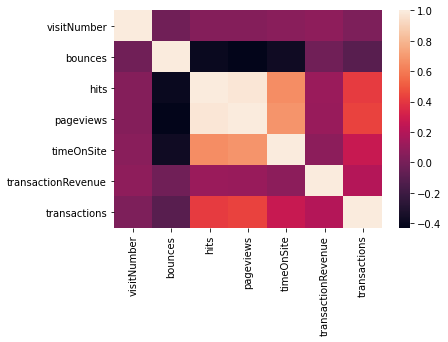

In [10]:
sns.heatmap(data.corr())

In [11]:
data.dropna(inplace = True)

In [12]:
data_dates = pd.DataFrame()   # mean revenue per month 
data_dates["month"] = pd.DatetimeIndex(data['date']).month
data_dates["revenue"] = data.transactionRevenue[data.transactionRevenue > 0]
print(data_dates.groupby(['month'])['revenue'].mean())

month
1    152.635433
2    166.245169
3    167.685901
4    240.189236
5    122.630009
6    132.851857
Name: revenue, dtype: float64


In [13]:
data_paises = pd.DataFrame()   # revenue on the countries with more than 7000 samples
data_paises["pais"] = data.groupby("country").filter(lambda x: len(x) > 7000)["country"]                                   
data_paises["revenue"] = data.transactionRevenue[data.transactionRevenue > 0]
print(data_paises.groupby(['pais'])['revenue'].mean())

pais
Canada            181.706750
France            135.625000
Germany            45.977500
India              59.584000
Japan             368.903636
United Kingdom    148.300000
United States     162.716430
Name: revenue, dtype: float64


In [14]:
data_full_visitor = data.iloc[data.groupby("fullVisitorID").filter(lambda x: len(x) > 50)["fullVisitorID"].index]

In [15]:
data_full_visitor.country.value_counts()

United States     803
India              94
United Kingdom     72
Canada             65
Germany            36
                 ... 
Afghanistan         1
Guernsey            1
Estonia             1
Nicaragua           1
Bhutan              1
Name: country, Length: 92, dtype: int64

In [16]:
data_full_visitor.date.value_counts()

2017-02-23    36
2017-03-06    31
2017-02-21    27
2017-03-09    25
2017-03-08    23
              ..
2017-06-04     1
2017-06-03     1
2017-06-25     1
2017-03-25     1
2017-01-01     1
Name: date, Length: 176, dtype: int64

In [45]:
data[data.country == "United States"][data.transactionRevenue > 0].city.value_counts() # new yor kand california the ones that pay more

not available in demo dataset    2030
New York                          672
Mountain View                     524
San Francisco                     324
Sunnyvale                         209
                                 ... 
Montreal                            1
Goose Creek                         1
Detroit                             1
Columbus                            1
Sacramento                          1
Name: city, Length: 68, dtype: int64

#### Next Are some charts that best describe the dataset

In [18]:
data_pivot_country = data.groupby("country").filter(lambda x: len(x) > 3000)
data_pivot_country = data_pivot_country.groupby("browser").filter(lambda x: len(x) > 3000)
data_pivot_country= data_pivot_country[["browser","deviceCategory","country"]]
serie = data_pivot_country.groupby(['country','browser',"deviceCategory"]).size()

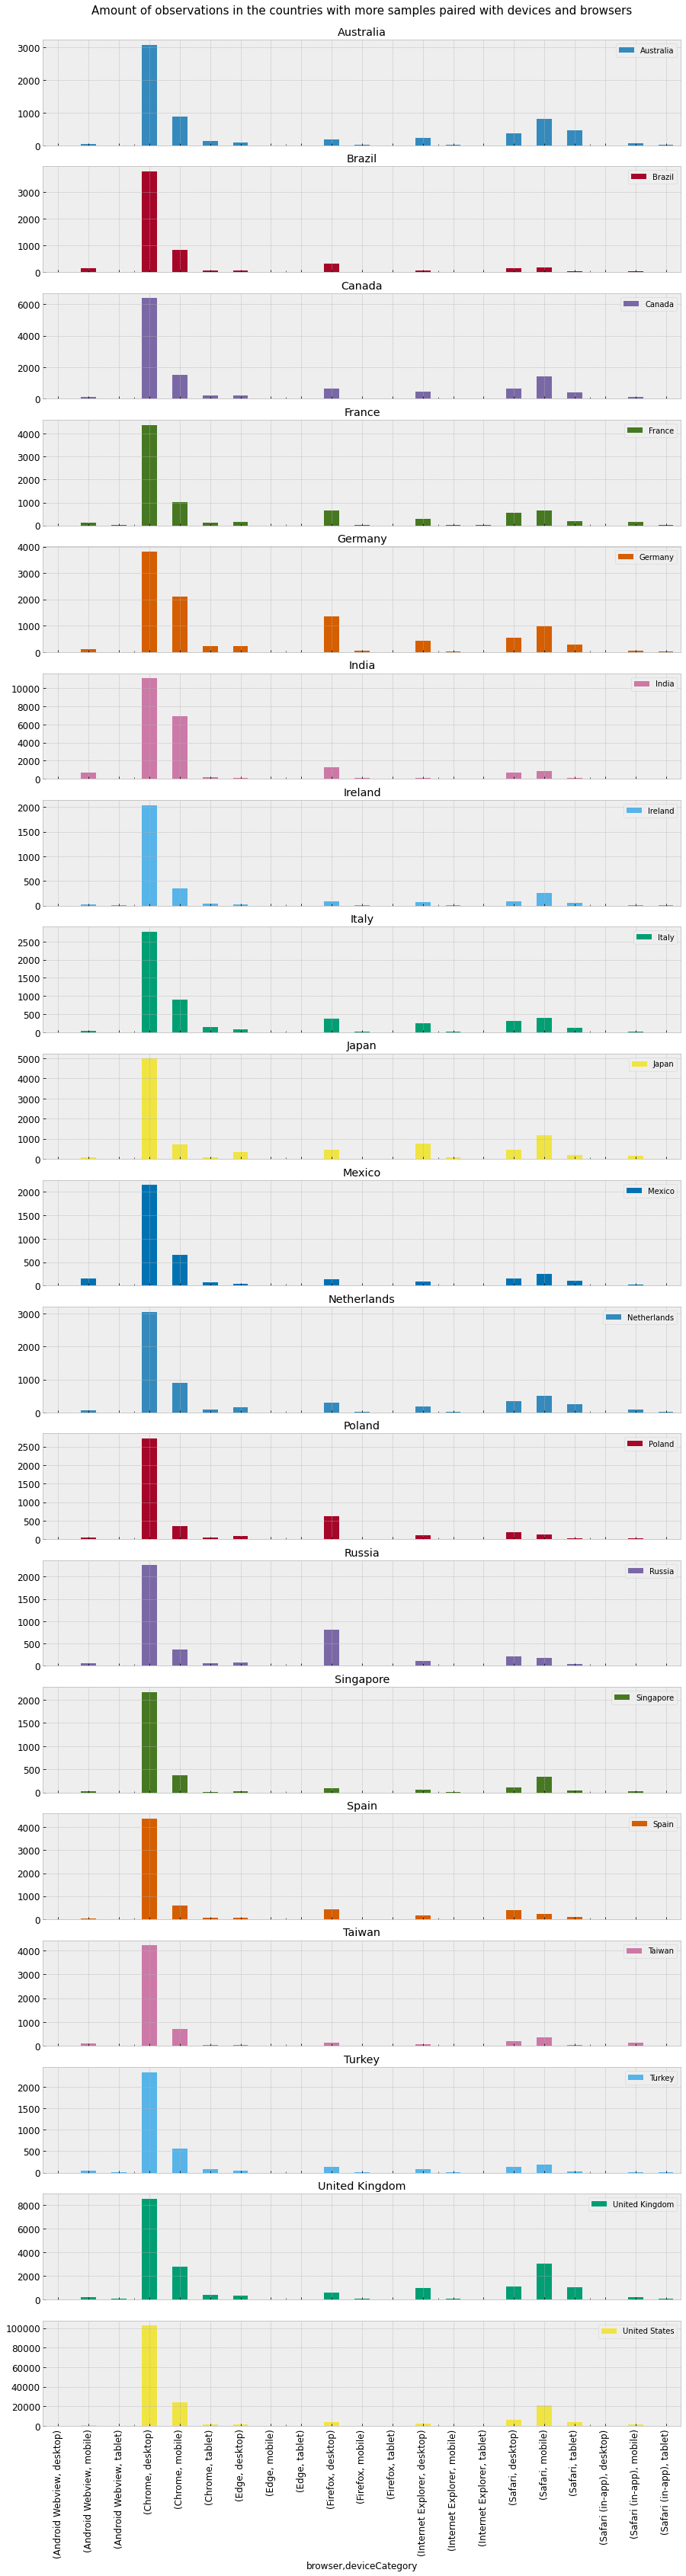

In [19]:
plt.style.use('bmh')
serie.unstack(level=[0]).plot(kind='bar', subplots=True ,figsize = (15,15), fontsize = 12,legend = True)
plt.subplots_adjust(bottom=0.1, top=3)
plt.title("Amount of observations in the countries with more samples paired with devices and browsers", x=0.5, y=22.8,fontsize=15);

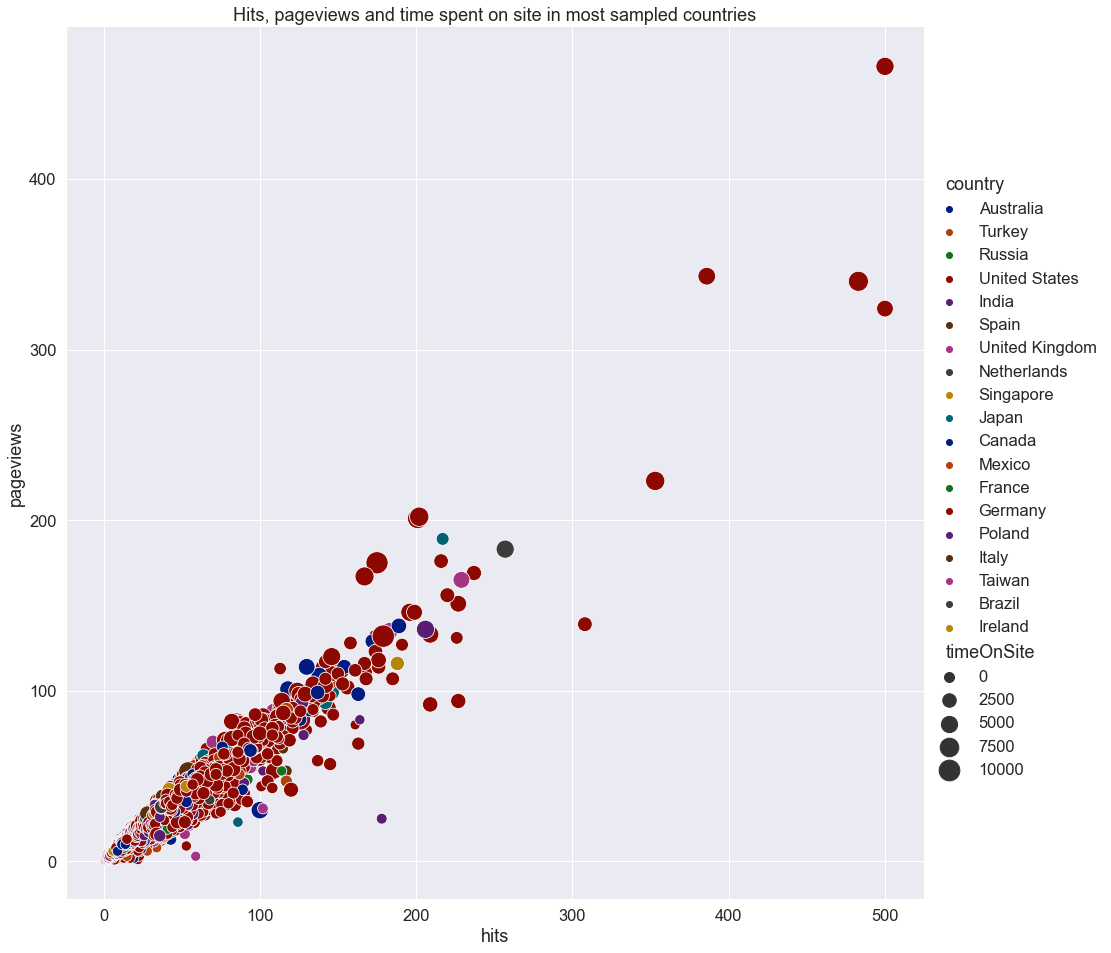

In [20]:
data_circles = data.groupby("country").filter(lambda x: len(x) > 3000)
sns.set(font_scale=1.5)
sns.relplot(x="hits", y="pageviews", hue="country", size="timeOnSite",
            sizes=(100, 500), alpha=1,
            height=13, data=data_circles,palette = "dark")
plt.title("Hits, pageviews and time spent on site in most sampled countries");

In [122]:
time = data[["date","transactionRevenue"]]

In [123]:
len(time.date.unique()) # 181 days got a transaction

181

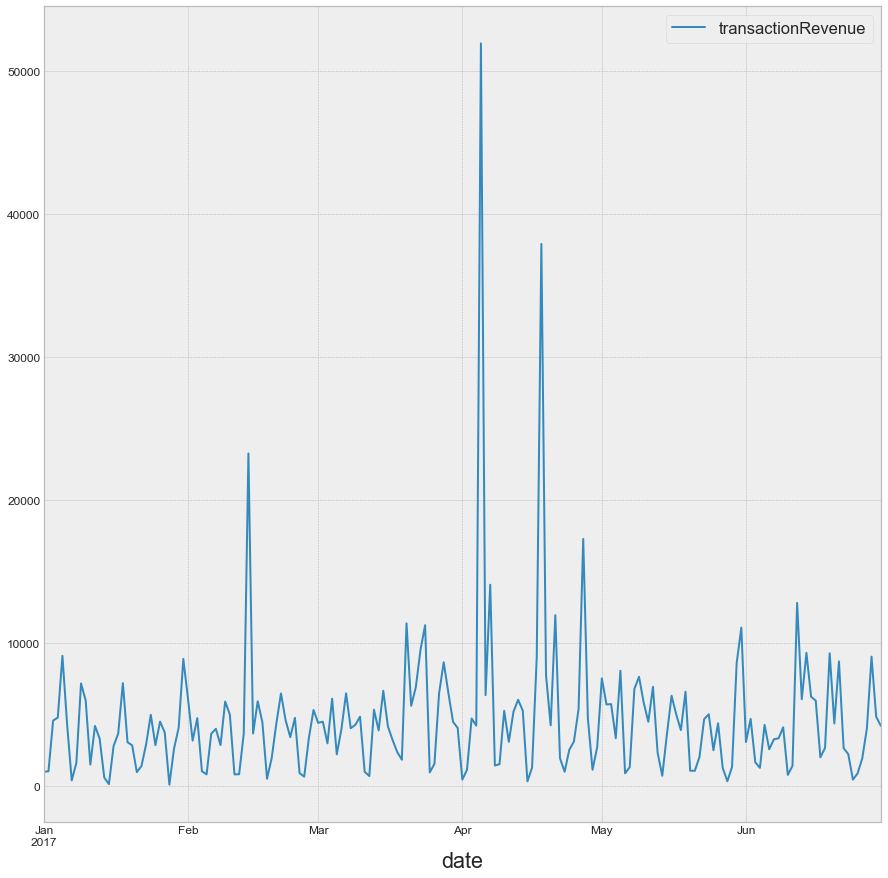

In [124]:
time = time.groupby("date").sum()
ax = time.plot(figsize = (15,15), fontsize = 12)
ax.legend(loc='upper right')

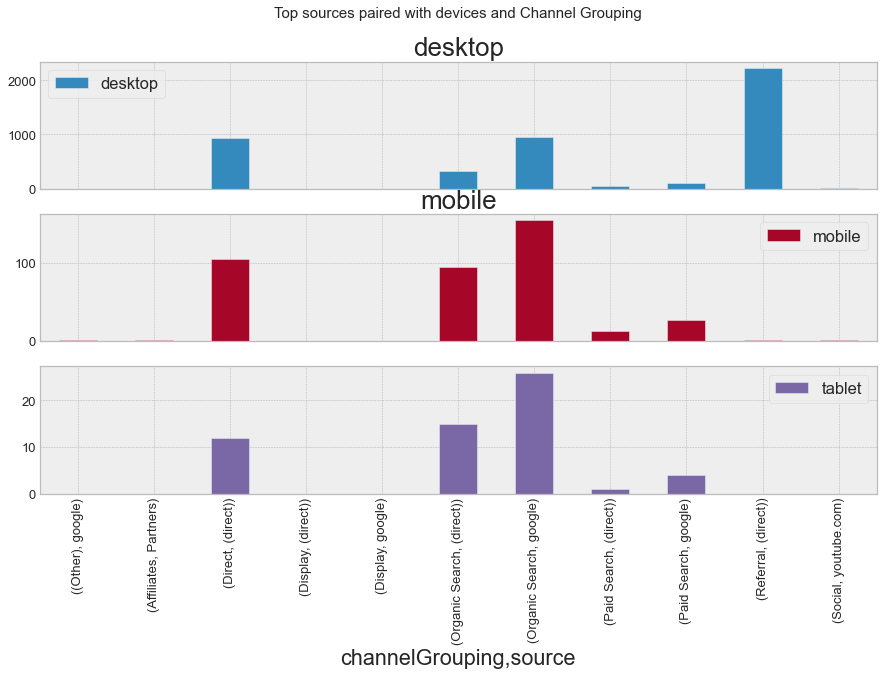

In [26]:
data_last_graph = data[["channelGrouping","source","deviceCategory"]][(data.source == "(direct)") |  (data.source == "google") | (data.source == "youtube.com") | (data.source == "analytics.google.com") | (data.source == "Partners")][data.transactionRevenue > 0]
graph = data_last_graph.groupby(["deviceCategory","channelGrouping","source"]).size()
plt.style.use('bmh')
graph.unstack(level=[0]).plot(kind='bar', subplots=True ,figsize = (15,15), fontsize = 13,legend = True)
plt.subplots_adjust(bottom=0.1, top = 0.5)
plt.title("Top sources paired with devices and Channel Grouping", x=0.5, y=3.7,fontsize=15);

#### Lastly some PCA and some feature importance

In [49]:
data["target"] =  data.transactions.apply (lambda x: 0 if x == 0  else 1)
X = pd.get_dummies(data.drop(columns = ['fullVisitorID','date','transactions','transactionRevenue','target']))
y = data.target

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
scaler = StandardScaler()

In [52]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [53]:
pca = PCA(n_components=3)
X_std = pca.fit_transform(X_std)

In [54]:
graphDf = pd.DataFrame(data = X_std
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [55]:
graphDf = pd.concat([graphDf, data[['target']]], axis = 1)

In [56]:
from mpl_toolkits import mplot3d

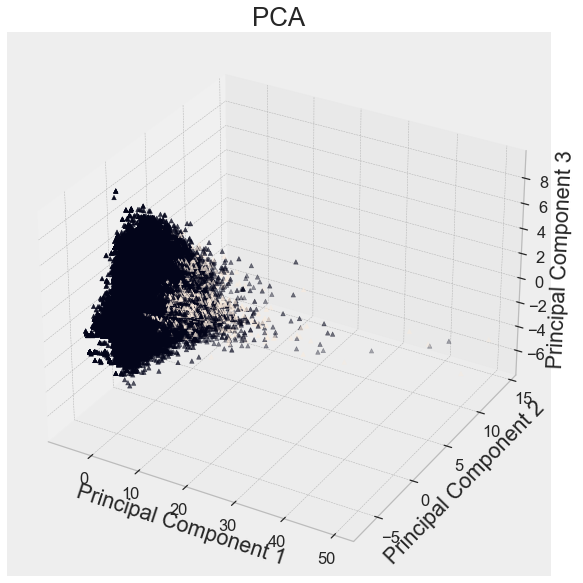

In [57]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(graphDf['principal component 1'], graphDf['principal component 2'], graphDf['principal component 3'], c=data.target,marker ='^')
plt.title("PCA")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3');     

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rf = RandomForestClassifier (n_jobs = -1 )
et = ExtraTreesClassifier ( n_jobs = -1  )

rf.fit(pd.get_dummies(data.drop(columns = ['fullVisitorID','date','transactions','transactionRevenue','city','bounces','source','country','target','browser'])),y)
et.fit(pd.get_dummies(data.drop(columns = ['fullVisitorID','date','transactions','transactionRevenue','city','bounces','source','country','target','browser'])),y)

ExtraTreesClassifier(n_jobs=-1)

<AxesSubplot:>

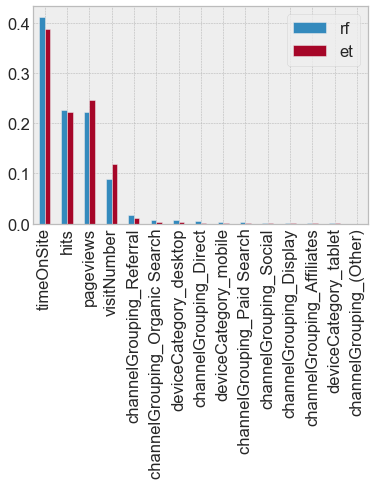

In [84]:
imp = pd.DataFrame({"rf" : rf.feature_importances_ , "et" : et.feature_importances_}).sort_values(['rf'],ascending = False)
names = pd.get_dummies(data.drop(columns = ['fullVisitorID','date','transactions','transactionRevenue','city','bounces','source','country','target','browser'])).columns[imp.index]
imp.index = names
imp.plot(kind = "bar")

In [127]:
time.to_csv("Data_time.csv")

In [143]:
data.to_csv('Data_Clusters.csv')

In [130]:
X.drop(columns = ['city_not available in demo dataset'],inplace = True)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(263213, 893)
(263213,)
(129643, 893)
(129643,)


In [150]:
X_train.to_csv('X_train.csv')

In [151]:
y_train.to_csv('y_train.csv')

In [152]:
X_test.to_csv('X_test.csv')

In [153]:
y_test.to_csv('y_test.csv')